In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import re
import pickle

In [2]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_4f070c0c0b3448ecb3fc6c787e7ef0bb = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='DiXjTp9o5KX8pkMzugRcnnT6NGmK45Wljg4Q_OfVOuFZ',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

body = client_4f070c0c0b3448ecb3fc6c787e7ef0bb.get_object(Bucket='toxiccommentclassification-donotdelete-pr-l08foafyhdof6u',Key='train.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

train_df = pd.read_csv(body)
train_df.head()


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [3]:

body = client_4f070c0c0b3448ecb3fc6c787e7ef0bb.get_object(Bucket='toxiccommentclassification-donotdelete-pr-l08foafyhdof6u',Key='test.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

test_df = pd.read_csv(body)
test_df.head()


,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [4]:
train_df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [5]:
test_df

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [6]:
cols_target = ['insult','toxic','severe_toxic','identity_hate','threat','obscene']

In [7]:
print(test_df.isnull().any())

id              False
comment_text    False
dtype: bool


<AxesSubplot:title={'center':'Correlation of features & targets'}>

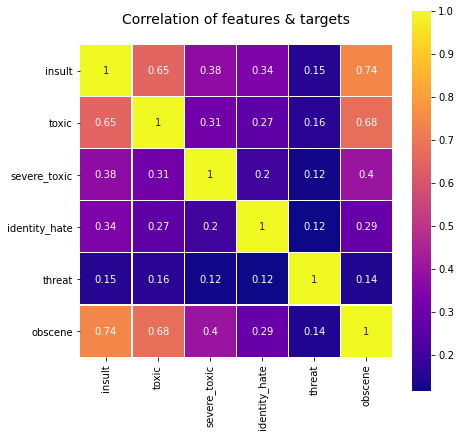

In [8]:
data = train_df[cols_target]

colormap = plt.cm.plasma
plt.figure(figsize=(7,7))
plt.title('Correlation of features & targets',y=1.05,size=14)
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0,square=True,cmap=colormap,
           linecolor='white',annot=True)


In [9]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [10]:
train_df['comment_text'] = train_df['comment_text'].map(lambda com : clean_text(com))
test_df['comment_text'] = test_df['comment_text'].map(lambda com : clean_text(com))


In [11]:
train_text = train_df['comment_text']
test_text = test_df['comment_text']
all_text = pd.concat([train_text, test_text])


In [12]:
from sklearn.feature_extraction.text import CountVectorizer
word_vect = CountVectorizer(
                            strip_accents='unicode',
                            analyzer='word',
                            token_pattern=r'\w{1,}',
                            stop_words='english',
                            ngram_range=(1, 1)
                            )
    

In [13]:
word_vect.fit(all_text)

CountVectorizer(stop_words='english', strip_accents='unicode',
                token_pattern='\\w{1,}')

In [14]:
train_features = word_vect.transform(train_text)
test_features = word_vect.transform(test_text)

In [15]:
pickle.dump(word_vect.vocabulary_,open('word_feats.pkl','wb'))

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression(C=12.0)
word_vect.fit(all_text)
train_features=word_vect.transform(train_text)
test_features=word_vect.transform(test_text)
pickle.dump(word_vect.vocabulary_,open('word_feats.pkl','wb'))

In [17]:
body = client_4f070c0c0b3448ecb3fc6c787e7ef0bb.get_object(Bucket='toxiccommentclassification-donotdelete-pr-l08foafyhdof6u',Key='sample_submission.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

submission_binary = pd.read_csv(body)
submission_binary.head()


,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.5,0.5,0.5,0.5,0.5,0.5
1,0000247867823ef7,0.5,0.5,0.5,0.5,0.5,0.5
2,00013b17ad220c46,0.5,0.5,0.5,0.5,0.5,0.5
3,00017563c3f7919a,0.5,0.5,0.5,0.5,0.5,0.5
4,00017695ad8997eb,0.5,0.5,0.5,0.5,0.5,0.5


In [18]:
submission_binary 

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.5,0.5,0.5,0.5,0.5,0.5
1,0000247867823ef7,0.5,0.5,0.5,0.5,0.5,0.5
2,00013b17ad220c46,0.5,0.5,0.5,0.5,0.5,0.5
3,00017563c3f7919a,0.5,0.5,0.5,0.5,0.5,0.5
4,00017695ad8997eb,0.5,0.5,0.5,0.5,0.5,0.5
...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,0.5,0.5,0.5,0.5,0.5,0.5
153160,fffd7a9a6eb32c16,0.5,0.5,0.5,0.5,0.5,0.5
153161,fffda9e8d6fafa9e,0.5,0.5,0.5,0.5,0.5,0.5
153162,fffe8f1340a79fc2,0.5,0.5,0.5,0.5,0.5,0.5


In [19]:
mapper = {}
for label in cols_target:
    mapper[label] = logreg
    filename = str(label+'_model.sav')
    print(filename)
    print('... Processing {}'.format(label))
    y = train_df[label]
    # train the model using train_features & y
    mapper[label].fit(train_features, y)

    #saving the fitted model for class "label"
    pickle.dump(mapper[label], open(filename, 'wb'))

    # compute the training accuracy
    y_pred_X = mapper[label].predict(train_features)
    print('Training accuracy is {}'.format(accuracy_score(y, y_pred_X)))
    # compute the predicted probabilities for X_test_dtm
    test_y_prob = mapper[label].predict_proba(test_features)[:,1]
    submission_binary[label] = test_y_prob


insult_model.sav
... Processing insult


/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy is 0.9749077213278102
toxic_model.sav
... Processing toxic


/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy is 0.9813123938560264
severe_toxic_model.sav
... Processing severe_toxic


/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy is 0.9921414292070614
identity_hate_model.sav
... Processing identity_hate


/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy is 0.9931441176654906
threat_model.sav
... Processing threat


/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy is 0.9986087697639295
obscene_model.sav
... Processing obscene
Training accuracy is 0.9840008522851896


/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
submission_binary.to_csv('submission_binary.csv',index=False)

In [21]:
!pip install ibm_watson_machine_learning

In [22]:
from ibm_watson_machine_learning import APIClient
wml_credentials = { "url": "https://us-south.ml.cloud.ibm.com",
                  "apikey": "ZZ0GwMuquoVb5rzJ6t0DPux5_c65dCdOJELYtgifdS2s"
                  }

In [23]:
client = APIClient(wml_credentials)


In [24]:
def guide_from_space_name(client,space_name):
    space = client.spaces.get_details()
    return(next(item for item in space['resources']if item['entity']["name"]== space_name)['metadata']['id'])

In [25]:
client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ------------  ------------------------
ID                                    NAME          CREATED
cf540862-2541-4cd7-8e33-518db115903b  Toxic Deploy  2022-04-03T05:44:38.724Z
------------------------------------  ------------  ------------------------


In [26]:
space_uid = guide_from_space_name(client,'Toxic Deploy')
print("Space UID = " + space_uid)

Space UID = cf540862-2541-4cd7-8e33-518db115903b


In [27]:
client.set.default_space(space_uid)

'SUCCESS'

In [28]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1-py3.9             12b83a17-24d8-5082-900f-0ab31fbfd3cb  base
scikit-learn_0.22-py3.6        154010f

In [50]:
MODEL_NAME = 'Toxic comment Classification'
DEPLOYMENT_NAME = 'Toxic Deploy'
bestmodel = logreg


In [51]:
# Set Python Version
software_spec_uid = client.software_specifications.get_id_by_name('default_py3.8')
# Setup model meta
model_props = {
    client.repository.ModelMetaNames.NAME: MODEL_NAME, 
    client.repository.ModelMetaNames.TYPE: 'scikit-learn_0.23', 
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid 
}

In [52]:
#Save model
model_details = client.repository.store_model(
    model= bestmodel, 
    meta_props= model_props, 
    training_data=y_pred_X, 
    training_target=test_y_prob,
)

Note: Warnings!! :  Software specification default_py3.8 specified for the wml_model is deprecated and will be removed in the future. We recommend you use runtime-22.1-py3.9 instead. For details see Supported Frameworks https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/pm_service_supported_frameworks.html


In [53]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'l1',
  'software_spec': {'id': 'ab9e1b80-f2ce-592c-a7d2-4f2344f77194',
   'name': 'default_py3.8'},
  'training_data_references': [{'connection': {'access_key_id': 'not_applicable',
     'endpoint_url': 'not_applicable',
     'secret_access_key': 'not_applicable'},
    'id': '1',
    'location': {},
    'schema': {'fields': [{'name': 'f1', 'type': 'int64'}],
     'id': '1',
     'type': 'ndarray'},
    'type': 's3'}],
  'type': 'scikit-learn_0.23'},
 'metadata': {'created_at': '2022-04-03T17:42:01.708Z',
  'id': 'dada390b-4970-4251-91c5-2a0c2a42733f',
  'modified_at': '2022-04-03T17:42:04.743Z',
  'name': 'Toxic comment Classification',
  'owner': 'IBMid-664003B7LX',
  'resource_key': '00adb6a5-4147-4176-87eb-a037789b05c0',
  'space_id': 'cf540862-2541-4cd7-8e33-518db115903b'},
 'system': {'warnings': [{'message': 'Software specification default_py3.8 specified for the wml_model is deprecated and will be removed in th

In [54]:
software_spec_uid

'ab9e1b80-f2ce-592c-a7d2-4f2344f77194'

In [55]:
model_uid=client.repository.get_model_id(model_details)


In [56]:
model_uid

'dada390b-4970-4251-91c5-2a0c2a42733f'

In [57]:
#set meta
deployment_props= {
    client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME,
    client.deployments.ConfigurationMetaNames.ONLINE:{}
}


In [58]:
deployment = client.deployments.create(
    artifact_uid=model_uid, 
    meta_props=deployment_props 
)



#######################################################################################

Synchronous deployment creation for uid: 'dada390b-4970-4251-91c5-2a0c2a42733f' started

#######################################################################################


initializing
Note: Software specification default_py3.8 is deprecated. Use runtime-22.1-py3.9 software specification instead. For details, see https://dataplatform.cloud.ibm.com/docs/content/wsj/wmls/wmls-deploy-python-types.html?context=cpdaas.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='f34719f9-736c-4df6-a6ae-01d41b2b1370'
------------------------------------------------------------------------------------------------




In [59]:
deployment_uid =client.deployments.get_uid(deployment)
deployment_uid


'f34719f9-736c-4df6-a6ae-01d41b2b1370'

In [60]:
payload = {"input_data":
           [
               {"fields":test_text.tolist(), "values":test_text.tolist()}
           ]
         }

In [61]:
result = client.deployments.score(deployment_uid, payload)
print(result)

ApiRequestFailure: Failure during scoring. (POST https://us-south.ml.cloud.ibm.com/ml/v4/deployments/f34719f9-736c-4df6-a6ae-01d41b2b1370/predictions?version=2021-06-24)
Status code: 400, body: {"trace": "da2613c4c44c8110506c49f94bc9483c", "errors": [{"code": "invalid_input_data", "message": "Expected input of type list(list) but obtained input of type list(str)", "target": {"type": "field", "name": "values"}}], "status_code": 400}
